In [4]:
import tensorflow as tf
from tensorflow.keras.utils import load_img
from keras.models import Sequential, Model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Input
import numpy as np
import random
import matplotlib.pyplot as plt
import os 
#import seaborn as sns
import warnings 
from tqdm.notebook import tqdm 
%matplotlib inline

In [5]:
BASE_DIR = 'C:\\Users\\kacpe\\OneDrive\\Pulpit\\Uczelnia\\semestr5\\MachineLearning\\UTKFace'
age_labels = []
image_paths = []

image_filenames = os.listdir(os.path.join(BASE_DIR, "Train"))
random.shuffle(image_filenames)

image_filenames[0]

'19_augmented_2_19_1_4_20170103233712235.jpg.chip.jpg'

In [ ]:
from move_images_folders import move_images

In [15]:
move_images(BASE_DIR)

FileNotFoundError: [WinError 3] System nie może odnaleźć określonej ścieżki: 'C:\\Users\\kacpe\\OneDrive\\Pulpit\\Uczelnia\\semestr5\\MachineLearning\\UTKFace\\UTKFace\\UTKFace'

In [3]:
for image in tqdm(image_filenames):
    image_path = os.path.join(BASE_DIR, image)
    img_components = image.split('_')

    if img_components[0] == '.ipynb':
        continue
    age_label = int(img_components[0])
    
    # Append the image_path, age_label, and gender_label
    age_labels.append(age_label)
    image_paths.append(image_path)

  0%|          | 0/23708 [00:00<?, ?it/s]

In [4]:
print(f'Number of age_labels: {len(age_labels)}, Number of image_paths: {len(image_paths)}')

Number of age_labels: 23708, Number of image_paths: 23708


In [5]:
import pandas as pd 
df = pd.DataFrame()
df['image_path'], df['age'] = image_paths, age_labels
df.head(5)

,image_path,age
0,C:\Users\micha\GitRepos\AgeRecognition(ML)\UTK...,35
1,C:\Users\micha\GitRepos\AgeRecognition(ML)\UTK...,43
2,C:\Users\micha\GitRepos\AgeRecognition(ML)\UTK...,31
3,C:\Users\micha\GitRepos\AgeRecognition(ML)\UTK...,39
4,C:\Users\micha\GitRepos\AgeRecognition(ML)\UTK...,92


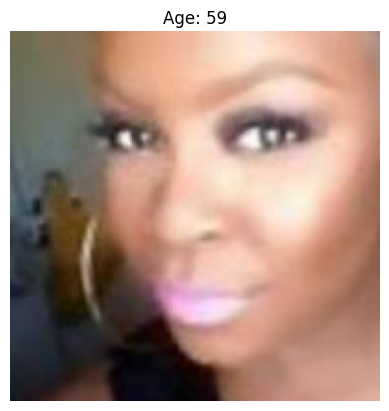

In [6]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age}')
plt.axis('off')
plt.imshow(IMG)

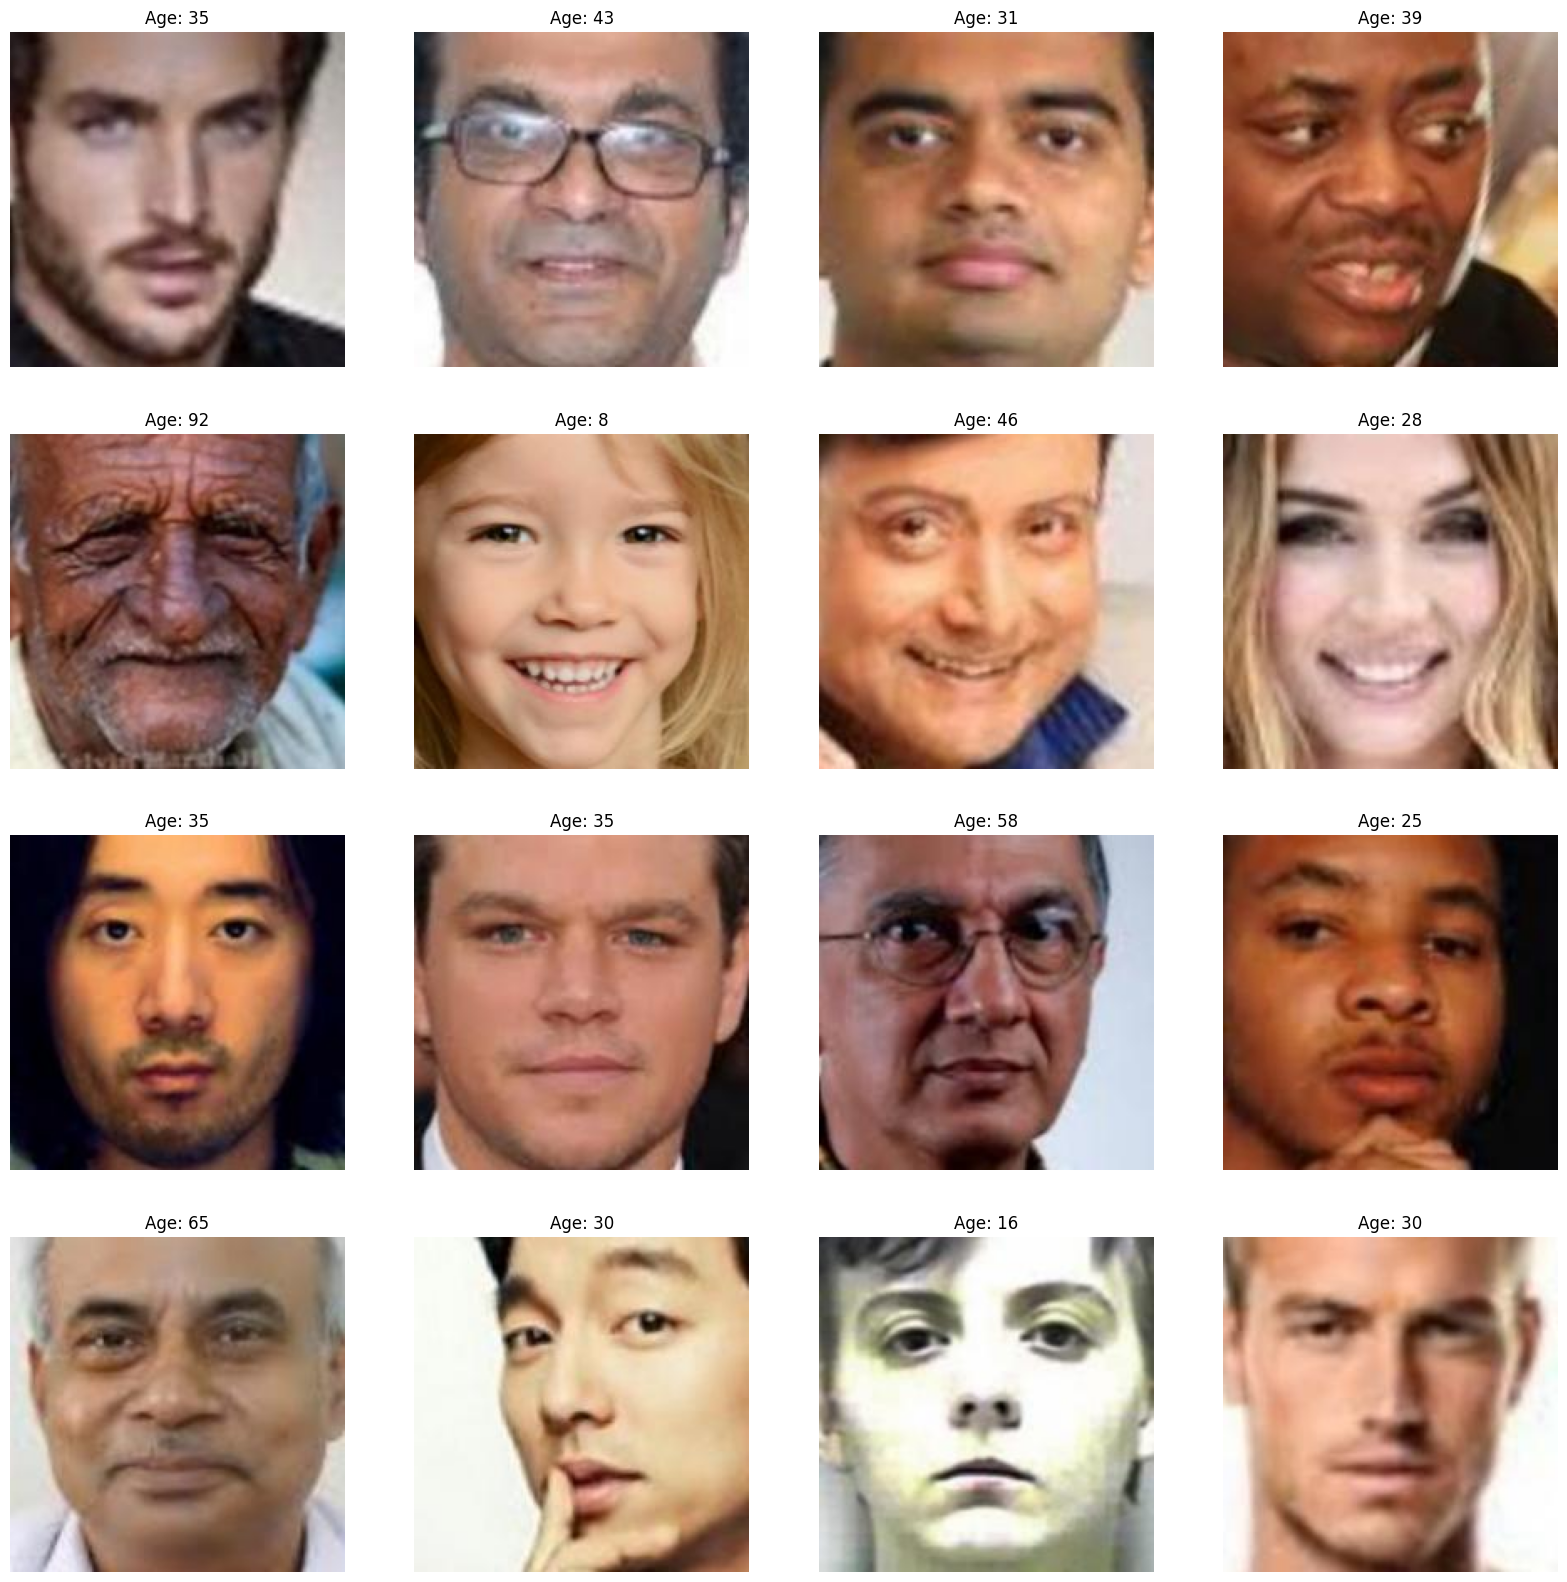

In [7]:
plt.figure(figsize=(20, 20))
samples = df.iloc[0:16]

for index, sample, age in samples.itertuples():
    plt.subplot(4, 4, index + 1)
    img = load_img(sample)
    img = np.array(img)
    plt.axis('off')
    plt.title(f'Age: {age}')
    plt.imshow(img)

In [1]:
import cv2
import numpy as np

def calculate_gradient(image):
    gradient_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=5)
    gradient_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=5)
    magnitude = np.sqrt(gradient_x ** 2 + gradient_y ** 2)
    return magnitude

In [2]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        img = load_img(image, color_mode = "grayscale")
        img = img.resize((128, 128), Image.LANCZOS)
        img = np.array(img)
        img = calculate_gradient(img)
        features.append(img)

    features = np.array(features)
    features = features.reshape(len(features), 128, 128, 1)
    return features

In [11]:
X = extract_image_features(df['image_path'])

  0%|          | 0/23708 [00:00<?, ?it/s]

In [12]:
X.shape

(23708, 128, 128, 1)

In [13]:
X = X / 255.0

In [7]:
y_age = np.array(df['age'])

NameError: name 'df' is not defined

In [8]:
input_shape = (128, 128, 1)

In [9]:
inputs = Input((input_shape))
conv_1 = Conv2D(32, kernel_size=(3, 3), activation='relu')(inputs)
max_1 = MaxPooling2D(pool_size=(2, 2))(conv_1)
conv_2 = Conv2D(64, kernel_size=(3, 3), activation='relu')(max_1)
max_2 = MaxPooling2D(pool_size=(2, 2))(conv_2)
conv_3 = Conv2D(128, kernel_size=(3, 3), activation='relu')(max_2)
max_3 = MaxPooling2D(pool_size=(2, 2))(conv_3)
conv_4 = Conv2D(256, kernel_size=(3, 3), activation='relu')(max_3)
max_4 = MaxPooling2D(pool_size=(2, 2))(conv_4)

flatten = Flatten()(max_4)

# fully connected layers
#dense_1 = Dense(256, activation='relu')(flatten)
dense_2 = Dense(256, activation='relu')(flatten)

#dropout_1 = Dropout(0.3)(dense_1)
dropout_2 = Dropout(0.3)(dense_2)

#output_1 = Dense(1, activation='sigmoid', name='gender_out')(dropout_1)
output_2 = Dense(1, activation='relu', name='age_out')(dropout_2)

model = Model(inputs=[inputs], outputs=[output_2])

model.compile(loss='mae',
              optimizer='adam', metrics=['accuracy'])

# mlflow.log_metric("test_rmse", 10) # error
# mlflow.sklearn.log_model(model, "models")

C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semestr5\MachineLearning\my_env\Lib\site-packages\_distutils_hack\__init__.py:33: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


In [19]:
history = model.fit(x=X, y=y_age,
                    batch_size=32, epochs=10, validation_split=0.2)

Epoch 1/10
593/593 [==============================] - 348s 585ms/step - loss: 15.4152 - accuracy: 0.0476 - val_loss: 13.4255 - val_accuracy: 0.0458
Epoch 2/10
593/593 [==============================] - 364s 613ms/step - loss: 11.8287 - accuracy: 0.0412 - val_loss: 10.5809 - val_accuracy: 0.0183
Epoch 3/10
593/593 [==============================] - 341s 575ms/step - loss: 9.9245 - accuracy: 0.0260 - val_loss: 10.5920 - val_accuracy: 0.0093
Epoch 4/10
593/593 [==============================] - 355s 598ms/step - loss: 8.9610 - accuracy: 0.0211 - val_loss: 7.9919 - val_accuracy: 0.0196
Epoch 5/10
593/593 [==============================] - 332s 559ms/step - loss: 8.1436 - accuracy: 0.0192 - val_loss: 7.8119 - val_accuracy: 0.0082
Epoch 6/10
593/593 [==============================] - 367s 619ms/step - loss: 7.6408 - accuracy: 0.0183 - val_loss: 7.2850 - val_accuracy: 0.0074
Epoch 7/10
593/593 [==============================] - 375s 633ms/step - loss: 7.3958 - accuracy: 0.0182 - val_loss: 7.1

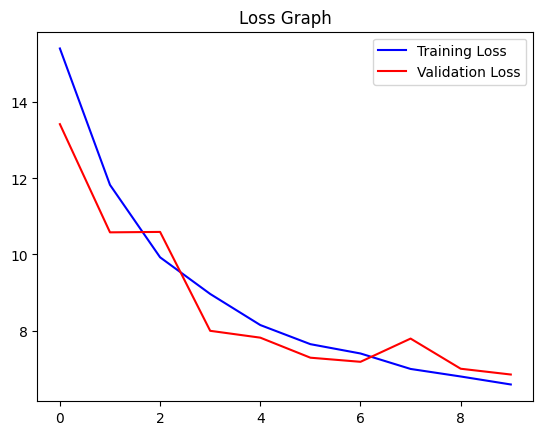

In [20]:
# plot results for age
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))

plt.plot(epochs, loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Loss Graph')
plt.legend()
plt.show()

In [10]:
def get_image_features(image):
  img = load_img(image, grayscale=True)
  img = img.resize((128, 128), Image.LANCZOS)
  img = np.array(img)
  img = img.reshape(1, 128, 128, 1)
  img = img / 255.0
  return img

1/1 [==============================] - 0s 149ms/step


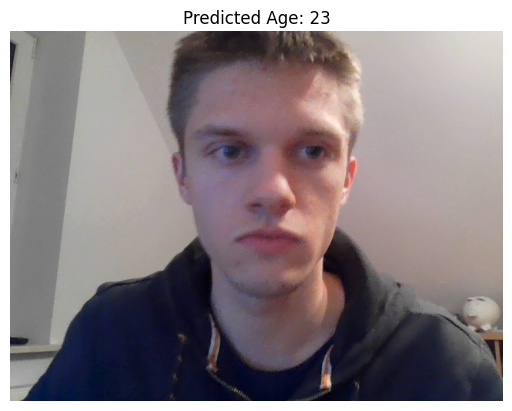

In [22]:
img_to_test = 'CamData/data/test/images/00bf6f4c-7fdd-11ee-9103-ec773ba9cb5a.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)
age = round(pred[0][0])

plt.title(f'Predicted Age: {age}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

In [23]:
from tensorflow.keras.models import load_model
model.save('AgeRecognitionModel.keras')

## ANOTHER MODEL

In [6]:
from move_images_folders import move_images

In [7]:
BASE_DIR = 'C:\\Users\\kacpe\\OneDrive\\Pulpit\\Uczelnia\\semestr5\\MachineLearning\\UTKFace'

In [8]:
move_images(BASE_DIR)

In [10]:
image_filenames = os.listdir(os.path.join(BASE_DIR,'Train'))

In [5]:
def get_ages_images_paths(image_filenames, folder):
    age_labels = []
    image_paths = []
    for image in tqdm(image_filenames):
        image_path = os.path.join(os.path.join(BASE_DIR, folder), image)
        img_components = image.split('_')
    
        if img_components[0] == '.ipynb':
            continue
        age_label = int(img_components[0])
        
        # Append the image_path, age_label, and gender_label
        age_labels.append(age_label)
        image_paths.append(image_path)
    return age_labels, image_paths

In [17]:
age_labels, image_paths = get_ages_images_paths(image_filenames, 'Train')

  0%|          | 0/16595 [00:00<?, ?it/s]

In [18]:
print(f'Number of age_labels: {len(age_labels)}, Number of image_paths: {len(image_paths)}')
import pandas as pd 
df = pd.DataFrame()
df['image_path'], df['age'] = image_paths, age_labels
df.head(5)

Number of age_labels: 16595, Number of image_paths: 16595


,image_path,age
0,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
1,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
2,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
3,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
4,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100


In [19]:
df['image_path']

0        C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
1        C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
2        C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
3        C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
4        C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
                               ...                        
16590    C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
16591    C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
16592    C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
16593    C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
16594    C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...
Name: image_path, Length: 16595, dtype: object

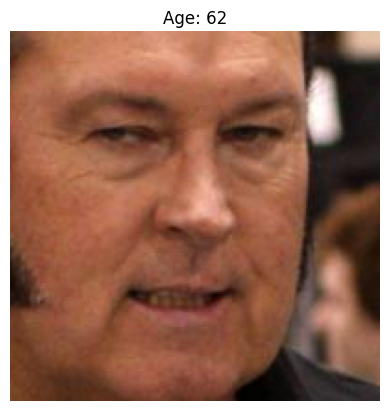

In [20]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age}')
plt.axis('off')
plt.imshow(IMG)

In [25]:
X = extract_image_features(df['image_path'])

  0%|          | 0/16595 [00:00<?, ?it/s]

In [26]:
image_filenames = os.listdir(os.path.join(BASE_DIR,'Val'))

In [27]:
age_labels_val, image_paths_val = get_ages_images_paths(image_filenames, 'Val')

  0%|          | 0/3557 [00:00<?, ?it/s]

In [28]:
print(f'Number of age_labels: {len(age_labels_val)}, Number of image_paths: {len(image_paths_val)}')
import pandas as pd 
df_val = pd.DataFrame()
df_val['image_path'],df_val['age'] = image_paths_val, age_labels_val
df_val.head(5)

Number of age_labels: 3557, Number of image_paths: 3557


,image_path,age
0,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
1,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,101
2,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,10
3,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,10
4,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,10


In [29]:
X_val = extract_image_features(df_val['image_path'])

  0%|          | 0/3557 [00:00<?, ?it/s]

In [36]:
X_val.shape
X_val = X_val / 255.0
y_age_val = np.array(df_val['age'])

In [37]:
X.shape
X = X / 255.0
y_age = np.array(df['age'])
input_shape = (128, 128, 1)

In [36]:
from keras.models import Sequential
from keras.layers import Conv2D, AveragePooling2D, GlobalAveragePooling2D, Dense

final_cnn = Sequential()

final_cnn.add(Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=input_shape))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=128, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

final_cnn.add(Conv2D(filters=256, kernel_size=3, activation='relu'))
final_cnn.add(AveragePooling2D(pool_size=(2,2)))

final_cnn.add(GlobalAveragePooling2D())

final_cnn.add(Dense(132, activation='relu'))

final_cnn.add(Dense(1, activation='linear')) # Predicting a continuous variable

final_cnn.compile(loss='mean_squared_error', optimizer='adam')

final_cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 126, 126, 32)      320       
                                                                 
 average_pooling2d_4 (Avera  (None, 63, 63, 32)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_5 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 average_pooling2d_5 (Avera  (None, 30, 30, 64)        0         
 gePooling2D)                                                    
                                                                 
 conv2d_6 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 average_pooling2d_6 (Avera  (None, 14, 14, 128)      

In [37]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
    rescale=1./255,
    horizontal_flip=True,
    shear_range=0.2,
    zoom_range=0.2,
    height_shift_range=0.1,
    width_shift_range=0.1,
    rotation_range=15
)

In [38]:
history = final_cnn.fit(datagen.flow(X, y_age, batch_size=32),
                        steps_per_epoch=len(X) / 32, epochs=60, verbose=1, validation_data=(X_val, y_age_val))

Epoch 1/60
497/497 [==============================] - 105s 208ms/step - loss: 437.6230 - val_loss: 622.4389
Epoch 2/60
497/497 [==============================] - 100s 201ms/step - loss: 399.7627 - val_loss: 529.7137
Epoch 3/60
497/497 [==============================] - 106s 213ms/step - loss: 398.3065 - val_loss: 701.8294
Epoch 4/60
497/497 [==============================] - 105s 211ms/step - loss: 393.1909 - val_loss: 608.5653
Epoch 5/60
497/497 [==============================] - 104s 208ms/step - loss: 394.5312 - val_loss: 533.4412
Epoch 6/60
497/497 [==============================] - 106s 213ms/step - loss: 391.8586 - val_loss: 519.4532
Epoch 7/60
497/497 [==============================] - 102s 204ms/step - loss: 390.0661 - val_loss: 738.3380
Epoch 8/60
497/497 [==============================] - 101s 203ms/step - loss: 385.7003 - val_loss: 493.6299
Epoch 9/60
497/497 [==============================] - 101s 203ms/step - loss: 381.3679 - val_loss: 730.9609
Epoch 10/60
497/497 [=======

In [33]:
def get_image_features(image):
  img = load_img(image, grayscale=True)
  img = img.resize((224, 224), Image.LANCZOS)
  img = np.array(img)
  img = img.reshape(1, 224, 224, 3)
  img = img / 255.0
  return img

In [46]:
img_to_test = 'FaceRecognition/CamData/data/test/images/00bf6f4c-7fdd-11ee-9103-ec773ba9cb5a.jpg'
features = get_image_features(img_to_test)
pred = final_cnn.predict(features)

1/1 [==============================] - 0s 23ms/step


In [54]:
print(pred)
age = round(pred[0][0])


[[58.20982]]


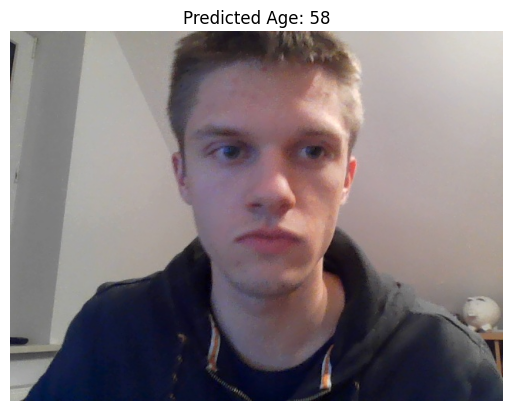

In [51]:
plt.title(f'Predicted Age: {age}')
plt.axis('off')
plt.imshow(np.array(load_img(img_to_test)))

In [52]:
from tensorflow.keras.models import load_model
final_cnn.save('BadlyWorkingModel.keras')

## ANOTHER

In [6]:
input_shape = (128, 128, 1)

In [5]:
from move_images_folders import move_images

In [8]:
BASE_DIR = 'C:\\Users\\kacpe\\OneDrive\\Pulpit\\Uczelnia\\semestr5\\MachineLearning\\UTKFace'

In [8]:
move_images(BASE_DIR, "AugmentedUTKFace")

In [9]:
image_filenames = os.listdir(os.path.join(BASE_DIR,'Train'))

In [10]:
age_labels, image_paths = get_ages_images_paths(image_filenames, 'Train')

  0%|          | 0/51665 [00:00<?, ?it/s]

In [11]:
print(f'Number of age_labels: {len(age_labels)}, Number of image_paths: {len(image_paths)}')
import pandas as pd 
df = pd.DataFrame()
df['image_path'], df['age'] = image_paths, age_labels
df.head(5)

Number of age_labels: 51665, Number of image_paths: 51665


,image_path,age
0,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
1,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
2,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
3,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
4,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100


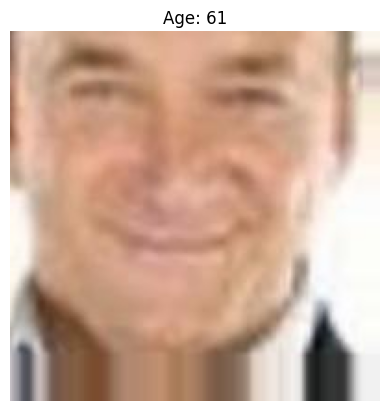

In [12]:
from PIL import Image

rand_index = random.randint(0, len(image_paths))
age = df['age'][rand_index]
IMG = Image.open(df['image_path'][rand_index])
plt.title(f'Age: {age}')
plt.axis('off')
plt.imshow(IMG)

In [13]:
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.applications.efficientnet import preprocess_input
import numpy as np
import os

In [14]:
def extract_image_features(images):
    features = list()

    for image in tqdm(images):
        # Load the image in grayscale
        img = load_img(image, color_mode="grayscale")
        # Convert the image to RGB
        img = img.convert("RGB")
        img = img.resize((224, 224), Image.LANCZOS)
        img = img_to_array(img)
        img = preprocess_input(img)
        features.append(img)

    features = np.array(features,dtype='uint8')
    return features

In [15]:
X = extract_image_features(df['image_path'])

  0%|          | 0/51665 [00:00<?, ?it/s]

In [16]:
image_filenames = os.listdir(os.path.join(BASE_DIR,'Val'))

In [17]:
age_labels_val, image_paths_val = get_ages_images_paths(image_filenames, 'Val')

  0%|          | 0/11072 [00:00<?, ?it/s]

In [18]:
print(f'Number of age_labels: {len(age_labels_val)}, Number of image_paths: {len(image_paths_val)}')
import pandas as pd 
df_val = pd.DataFrame()
df_val['image_path'],df_val['age'] = image_paths_val, age_labels_val
df_val.head(5)

Number of age_labels: 11072, Number of image_paths: 11072


,image_path,age
0,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
1,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
2,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
3,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100
4,C:\Users\kacpe\OneDrive\Pulpit\Uczelnia\semest...,100


In [19]:
X_val = extract_image_features(df_val['image_path'])

  0%|          | 0/11072 [00:00<?, ?it/s]

In [20]:
X_val.shape

(11072, 224, 224, 3)

In [21]:
y_age_val = np.array(df_val['age'])

In [22]:
y_age = np.array(df['age'])

In [23]:
input_shape = (224, 224, 3)


from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the EfficientNetB0 model
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=input_shape)

# Freeze the base model
base_model.trainable = False

# Add a global spatial average pooling layer
x = base_model.output
x = GlobalAveragePooling2D()(x)

# Add a fully-connected layer
x = Dense(1024, activation='relu')(x)

# Add a logistic layer for age prediction
predictions = Dense(1, activation='linear')(x)

# This is the model we will train
model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print a summary of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 rescaling (Rescaling)       (None, 224, 224, 3)          0         ['input_1[0][0]']             
                                                                                                  
 normalization (Normalizati  (None, 224, 224, 3)          7         ['rescaling[0][0]']           
 on)                                                                                              
                                                                                                  
 rescaling_1 (Rescaling)     (None, 224, 224, 3)          0         ['normalization[0][0]']   

In [24]:
model.fit(X, y_age, epochs=9, batch_size=32, validation_data=(X_val, y_age_val))
# history = final_cnn.fit(datagen.flow(X, y_age, batch_size=32),
#                         steps_per_epoch=len(X) / 32, epochs=60, verbose=1, validation_data=(X_val, y_age_val))

Epoch 1/9
1615/1615 [==============================] - 2703s 2s/step - loss: 178.4542 - val_loss: 138.3761
Epoch 2/9
1615/1615 [==============================] - 6125s 4s/step - loss: 138.9834 - val_loss: 131.7892
Epoch 3/9
1615/1615 [==============================] - 3135s 2s/step - loss: 128.2680 - val_loss: 117.2372
Epoch 4/9
1615/1615 [==============================] - 1336s 827ms/step - loss: 121.3367 - val_loss: 112.4200
Epoch 5/9
1615/1615 [==============================] - 1332s 825ms/step - loss: 115.3387 - val_loss: 110.1497
Epoch 6/9
1615/1615 [==============================] - 1331s 824ms/step - loss: 109.5670 - val_loss: 107.1246
Epoch 7/9
1615/1615 [==============================] - 1356s 840ms/step - loss: 104.5487 - val_loss: 113.3910
Epoch 8/9
1615/1615 [==============================] - 1370s 848ms/step - loss: 100.0799 - val_loss: 100.6408
Epoch 9/9
1615/1615 [==============================] - 1367s 847ms/step - loss: 95.3003 - val_loss: 98.5089


In [ ]:
model.save('EfficientNet.keras')

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('EfficientNet.keras')

In [31]:
model.fit(X, y_age, epochs=25, batch_size=32, validation_data=(X_val, y_age_val))

Epoch 1/25
1615/1615 [==============================] - 2283s 1s/step - loss: 50.9290 - val_loss: 73.8072
Epoch 2/25
1615/1615 [==============================] - 1382s 856ms/step - loss: 49.5741 - val_loss: 75.8213
Epoch 3/25
1615/1615 [==============================] - 1381s 855ms/step - loss: 50.1321 - val_loss: 76.1962
Epoch 4/25
1615/1615 [==============================] - 1386s 858ms/step - loss: 48.0255 - val_loss: 75.3372
Epoch 5/25
1615/1615 [==============================] - 1452s 899ms/step - loss: 47.0380 - val_loss: 76.1953
Epoch 6/25
1615/1615 [==============================] - 1385s 858ms/step - loss: 45.9349 - val_loss: 74.3696
Epoch 7/25
1615/1615 [==============================] - 1379s 854ms/step - loss: 46.0928 - val_loss: 74.6137
Epoch 8/25
1615/1615 [==============================] - 1380s 855ms/step - loss: 45.1137 - val_loss: 73.5338
Epoch 9/25
1615/1615 [==============================] - 1386s 858ms/step - loss: 43.9478 - val_loss: 80.7504
Epoch 10/25
1615/1615 

In [37]:
def get_image_features(image):
    img = load_img(image, target_size=(224, 224))
    img = np.array(img)
    img = img / 255.0
    img = np.expand_dims(img, axis=0)
    return img

In [43]:
model.fit(X, y_age, epochs=2, batch_size=32, validation_data=(X_val, y_age_val))

Epoch 1/2
 295/1615 [====>.........................] - ETA: 18:02 - loss: 34.8866

KeyboardInterrupt: 

In [40]:
img_to_test = 'FaceRecognition/CamData/data/test/images/00bf6f4c-7fdd-11ee-9103-ec773ba9cb5a.jpg'
features = get_image_features(img_to_test)
pred = model.predict(features)

1/1 [==============================] - 0s 104ms/step


In [42]:
print(pred)

[[38.04507]]


In [32]:
model.save('EfficientNet2.keras')

In [ ]:
model.fit(X, y_age, epochs=9, batch_size=32, validation_data=(X_val, y_age_val))

In [ ]:
model.fit(X, y_age, epochs=9, batch_size=32, validation_data=(X_val, y_age_val))

In [ ]:
model.save('EfficientNet5.keras')